# Load modules

In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization, Activation

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

import pandas as pd       
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
%matplotlib inline

pd.options.display.max_colwidth = 100

import random
import os

from numpy.random import seed
seed(42)

random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob
import cv2

from tensorflow.random import set_seed
set_seed(42)

import warnings
warnings.filterwarnings('ignore')

In [2]:
print(" All directories of the chest_xray dataset are as follows: ", os.listdir("../input/chest-xray-pneumonia/chest_xray/"))

 All directories of the chest_xray dataset are as follows:  ['chest_xray', '__MACOSX', 'val', 'test', 'train']


# Checking the count of pneumonia and normal images in the provided dataset.

In [3]:
train_dir = "../input/chest-xray-pneumonia/chest_xray/train"
test_dir = "../input/chest-xray-pneumonia/chest_xray/test"
val_dir = "../input/chest-xray-pneumonia/chest_xray/val"

print("Train set:\n=================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(train_dir, 'NORMAL')))}")

print("   ")
print("Test set:\n=================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("   ")
print("Validation set:\n================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

Train set:
PNEUMONIA=3875
NORMAL=1341
   
Test set:
PNEUMONIA=390
NORMAL=234
   
Validation set:
PNEUMONIA=8
NORMAL=8


# Checking Image specific details

# Preprocessing Starts

In [4]:
IMG_SIZE = 227
BATCH = 32
SEED = 42

## Getting all the images and their corresponding lables into dataframe.

In [5]:
main_path = "../input/chest-xray-pneumonia/chest_xray"

train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")

In [6]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

In [7]:
temp1 = [x for x in test_pneumonia]
len(temp1)

390

In [8]:
df_train

,class,image
0,Normal,../input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0771-0001.jpeg
1,Normal,../input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1294-0001-0002.jpeg
2,Normal,../input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0675-0001.jpeg
3,Normal,../input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1169-0001.jpeg
4,Normal,../input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0421-0001.jpeg
...,...,...
5211,Pneumonia,../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1541_virus_2681.jpeg
5212,Pneumonia,../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person799_virus_1431.jpeg
5213,Pneumonia,../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person931_virus_1592.jpeg
5214,Pneumonia,../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person861_virus_1506.jpeg


In [9]:
df_test

,class,image
0,Normal,../input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0336-0001.jpeg
1,Normal,../input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0101-0001.jpeg
2,Normal,../input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0337-0001.jpeg
3,Normal,../input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0198-0001.jpeg
4,Normal,../input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0013-0001.jpeg
...,...,...
619,Pneumonia,../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person1659_virus_2867.jpeg
620,Pneumonia,../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person1615_virus_2801.jpeg
621,Pneumonia,../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person1664_virus_2877.jpeg
622,Pneumonia,../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person111_bacteria_536.jpeg


# Test Train Split with stratified sampling and shuffle as True

In [10]:
train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = SEED, stratify = df_train['class'], shuffle=True)

In [11]:
print("Training data shape is : ", train_df.shape)
print("Validation data shape is : ", val_df.shape)

Training data shape is :  (4172, 2)
Validation data shape is :  (1044, 2)


# Initializing ImagedataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  zoom_range = 0.1,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1)

val_datagen = ImageDataGenerator(rescale=1/255.)

In [13]:
ds_train = train_datagen.flow_from_dataframe(train_df,
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'binary',
                                             batch_size = BATCH,
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(val_df,
                                        x_col = 'image',
                                        y_col = 'class',
                                        target_size = (IMG_SIZE, IMG_SIZE),
                                        class_mode = 'binary',
                                        batch_size = BATCH,
                                        seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                        x_col = 'image',
                                        y_col = 'class',
                                        target_size = (IMG_SIZE, IMG_SIZE),
                                        class_mode = 'binary',
                                        batch_size = 1,
                                        shuffle = False)

Found 4172 validated image filenames belonging to 2 classes.
Found 1044 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


In [14]:
# Class weights
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)
class_weight = {0: weight_for_0, 1: weight_for_1}
print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.74
Weight for class 1: 0.26


# Building Models.

# Building Alexnet Model

1. Architecture - 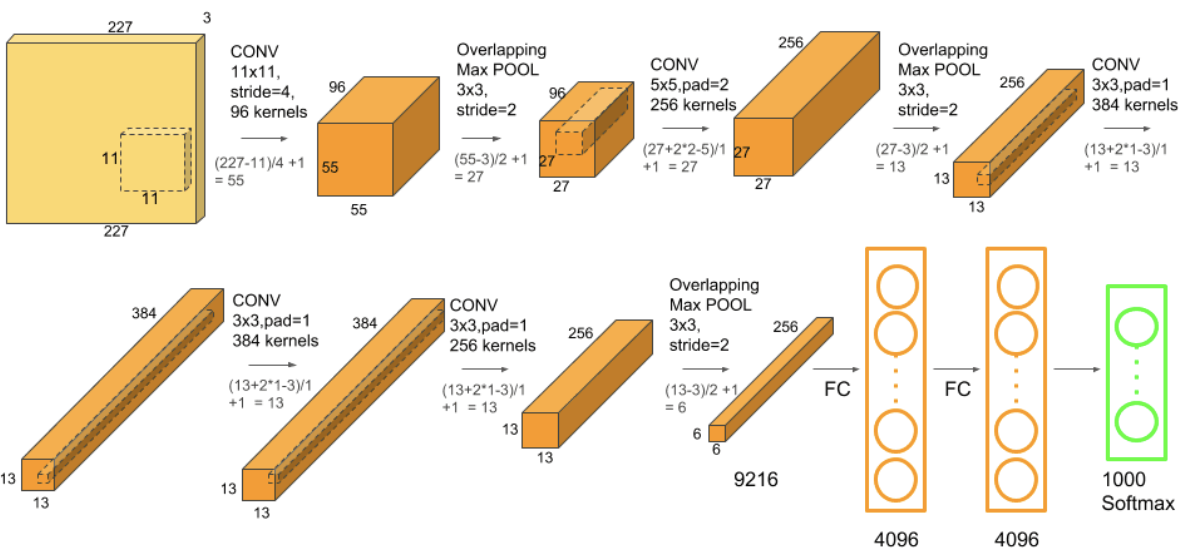


In [15]:
# Initializing
AlexNet = Sequential()

# 1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

# 4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

# 5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

# Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(1))
AlexNet.add(Activation('sigmoid'))

#Model Summary
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 57, 57, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 57, 57, 96)        384       
_________________________________________________________________
activation (Activation)      (None, 57, 57, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 256)       1024      
_________________________________________________________________
activation_1 (Activation)    (None, 29, 29, 256)       0

In [16]:
tf.keras.backend.clear_session()

AlexNet.compile(loss='binary_crossentropy',
                optimizer = keras.optimizers.Adam(learning_rate=3e-5),
                metrics='accuracy')

early_stopping = callbacks.EarlyStopping(monitor='val_loss',
                                         patience=5,
                                         min_delta=1e-7,
                                         restore_best_weights=True,
                                        )

plateau = callbacks.ReduceLROnPlateau(monitor='val_loss',
                                      factor = 0.2,
                                      patience = 2,
                                      min_delt = 1e-7,
                                      cooldown = 0,
                                      verbose = 1
                                     ) 

history = AlexNet.fit(ds_train,
                      batch_size = BATCH,
                      epochs = 10,
                      validation_data=ds_val,
                      callbacks=[early_stopping, plateau],
                      steps_per_epoch=(len(train_df)/BATCH),
                      validation_steps=(len(val_df)/BATCH),
                      class_weight=class_weight)

Epoch 1/10
130/130 [==============================] - 148s 1s/step - loss: 0.0995 - accuracy: 0.8821 - val_loss: 1.6644 - val_accuracy: 0.7433
Epoch 2/10
130/130 [==============================] - 104s 800ms/step - loss: 0.0685 - accuracy: 0.9259 - val_loss: 2.1192 - val_accuracy: 0.7433
Epoch 3/10
130/130 [==============================] - 105s 806ms/step - loss: 0.0639 - accuracy: 0.9362 - val_loss: 2.0157 - val_accuracy: 0.7433

Epoch 00003: ReduceLROnPlateau reducing learning rate to 5.9999998484272515e-06.
Epoch 4/10
130/130 [==============================] - 106s 816ms/step - loss: 0.0543 - accuracy: 0.9511 - val_loss: 1.3126 - val_accuracy: 0.7471
Epoch 5/10
130/130 [==============================] - 106s 809ms/step - loss: 0.0469 - accuracy: 0.9533 - val_loss: 0.1178 - val_accuracy: 0.9617
Epoch 6/10
130/130 [==============================] - 107s 822ms/step - loss: 0.0476 - accuracy: 0.9561 - val_loss: 0.0697 - val_accuracy: 0.9770
Epoch 7/10
130/130 [=========================

# Checking predictions and confusion matrix

In [17]:
num_label = {'Normal': 0, 'Pneumonia' : 1}
Y_test = df_test['class'].copy().map(num_label).astype('int')
Y_test

0      0
1      0
2      0
3      0
4      0
      ..
619    1
620    1
621    1
622    1
623    1
Name: class, Length: 624, dtype: int64

In [18]:
# ds_test.reset()
predictions = AlexNet.predict(ds_test, steps=len(ds_test), verbose=0)
# print(predictions)
pred_labels= np.where(predictions>0.5, 1, 0)
# print(pred_labels)

print("Test Accuracy: ", accuracy_score(Y_test, pred_labels))

Test Accuracy:  0.9022435897435898


# Confusion Matrix

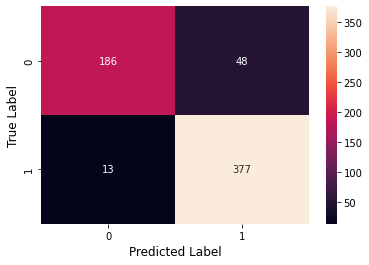

In [19]:
confusion_matrix = metrics.confusion_matrix(Y_test, pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

# Classification report

In [20]:
print(metrics.classification_report(Y_test, pred_labels, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86       234
           1       0.89      0.97      0.93       390

    accuracy                           0.90       624
   macro avg       0.91      0.88      0.89       624
weighted avg       0.90      0.90      0.90       624



# Builsing Resnet 152 pretrained model.

In [21]:
print("Image Size : ", IMG_SIZE)

base_model = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model.trainable = False

def get_pretrained():
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = base_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

Image Size :  227
234561536/234545216 [==============================] - 6s 0us/step


In [22]:
keras.backend.clear_session()

model_pretrained = get_pretrained()
model_pretrained.compile(loss='binary_crossentropy',
                         optimizer = keras.optimizers.Adam(learning_rate=5e-5),
                         metrics='binary_accuracy')

In [23]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-13]:
    layer.trainable = False

In [24]:
model_pretrained.compile(loss='binary_crossentropy',
                         optimizer = keras.optimizers.Adam(learning_rate=2e-6),
                         metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
resnet152v2 (Functional)     (None, 8, 8, 2048)        58331648  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 58,594,049
Trainable params: 4,731,137
Non-trainable params: 53,862,912
_________________________________________

In [25]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 10,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH))

Epoch 1/10
130/130 [==============================] - 123s 873ms/step - loss: 0.5662 - binary_accuracy: 0.7380 - val_loss: 0.4841 - val_binary_accuracy: 0.7874
Epoch 2/10
130/130 [==============================] - 111s 851ms/step - loss: 0.4351 - binary_accuracy: 0.8313 - val_loss: 0.3733 - val_binary_accuracy: 0.8649
Epoch 3/10
130/130 [==============================] - 110s 843ms/step - loss: 0.3587 - binary_accuracy: 0.8708 - val_loss: 0.3092 - val_binary_accuracy: 0.9138
Epoch 4/10
130/130 [==============================] - 111s 847ms/step - loss: 0.2981 - binary_accuracy: 0.9027 - val_loss: 0.2677 - val_binary_accuracy: 0.9253
Epoch 5/10
130/130 [==============================] - 112s 855ms/step - loss: 0.2549 - binary_accuracy: 0.9209 - val_loss: 0.2370 - val_binary_accuracy: 0.9310
Epoch 6/10
130/130 [==============================] - 113s 868ms/step - loss: 0.2352 - binary_accuracy: 0.9207 - val_loss: 0.2149 - val_binary_accuracy: 0.9349
Epoch 7/10
130/130 [====================

In [26]:
num_label = {'Normal': 0, 'Pneumonia' : 1}
Y_test = df_test['class'].copy().map(num_label).astype('int')

In [27]:
predictions = model_pretrained.predict(ds_test, steps=len(ds_test), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)

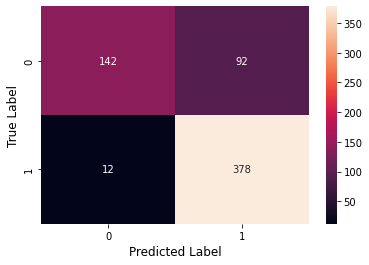

In [28]:
confusion_matrix = metrics.confusion_matrix(Y_test, pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [29]:
print(metrics.classification_report(Y_test, pred_labels, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.92      0.61      0.73       234
           1       0.80      0.97      0.88       390

    accuracy                           0.83       624
   macro avg       0.86      0.79      0.81       624
weighted avg       0.85      0.83      0.82       624



# Resnet50

In [30]:
print("Image Size : ", IMG_SIZE)

base_model = tf.keras.applications.ResNet50(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

def get_pretrained():
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = base_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

Image Size :  227
94781440/94765736 [==============================] - 3s 0us/step


In [31]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-13]:
    layer.trainable = False

In [32]:
keras.backend.clear_session()

model_pretrained = get_pretrained()

model_pretrained.compile(loss='binary_crossentropy',
                         optimizer = keras.optimizers.Adam(learning_rate=2e-6),
                         metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 8, 8, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 23,850,113
Trainable params: 4,732,161
Non-trainable params: 19,117,952
_________________________________________

In [33]:
model_pretrained.compile(loss='binary_crossentropy',
                         optimizer = tf.keras.optimizers.Adam(learning_rate=2e-6),
                         metrics='binary_accuracy')

In [34]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss',
                                         patience=5,
                                         min_delta=1e-7,
                                         restore_best_weights=True,
                                        )

plateau = callbacks.ReduceLROnPlateau(monitor='val_loss',
                                      factor = 0.2,
                                      patience = 2,
                                      min_delt = 1e-7,
                                      cooldown = 0,
                                      verbose = 1
                                     ) 

In [35]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 10,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH))

Epoch 1/10
130/130 [==============================] - 111s 827ms/step - loss: 0.5563 - binary_accuracy: 0.7428 - val_loss: 0.5681 - val_binary_accuracy: 0.7433
Epoch 2/10
130/130 [==============================] - 105s 810ms/step - loss: 0.5191 - binary_accuracy: 0.7426 - val_loss: 0.5330 - val_binary_accuracy: 0.7433
Epoch 3/10
130/130 [==============================] - 105s 806ms/step - loss: 0.4864 - binary_accuracy: 0.7438 - val_loss: 0.4729 - val_binary_accuracy: 0.7433
Epoch 4/10
130/130 [==============================] - 104s 798ms/step - loss: 0.4477 - binary_accuracy: 0.7622 - val_loss: 0.4255 - val_binary_accuracy: 0.7835
Epoch 5/10
130/130 [==============================] - 107s 820ms/step - loss: 0.4080 - binary_accuracy: 0.7979 - val_loss: 0.3817 - val_binary_accuracy: 0.8420
Epoch 6/10
130/130 [==============================] - 107s 817ms/step - loss: 0.3754 - binary_accuracy: 0.8267 - val_loss: 0.3537 - val_binary_accuracy: 0.8649
Epoch 7/10
130/130 [====================

In [36]:
score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

score = model_pretrained.evaluate(ds_test, steps = len(df_test), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Val loss: 0.2515294551849365
Val accuracy: 0.9147509336471558
Test loss: 0.43956589698791504
Test accuracy: 0.7932692170143127


In [37]:
num_label = {'Normal': 0, 'Pneumonia' : 1}
Y_test = df_test['class'].copy().map(num_label).astype('int')

In [38]:
predictions = model_pretrained.predict(ds_test, steps=len(ds_test), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)

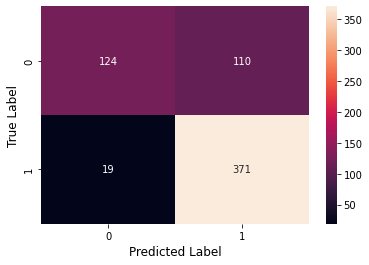

In [39]:
confusion_matrix = metrics.confusion_matrix(Y_test, pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [40]:
print(metrics.classification_report(Y_test, pred_labels, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.87      0.53      0.66       234
           1       0.77      0.95      0.85       390

    accuracy                           0.79       624
   macro avg       0.82      0.74      0.75       624
weighted avg       0.81      0.79      0.78       624

